In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from artifact import Artifacts, ArtifactList, Artifact
from stage import Stage, stage

In [22]:
Artifacts.display()

In [4]:
#from examples import lr_vs_rf, which_is_best
from examples import simple_lr, simple_rf, simple_lr_unbalanced, compare_all, find_max_of_scores

In [6]:
temp_stage = find_max_of_scores(["thing1", "thing2"], [1.0, 2.0])
temp_stage

Stage(function=<function find_max_of_scores at 0x7f09f2e34c10>, args=[['thing1', 'thing2'], [1.0, 2.0]], kwargs={}, outputs=Artifact 'max_score', hashing_functions=None, pass_self=False, max_score=Artifact 'max_score')

In [7]:
temp_stage.outputs

Artifact 'max_score'

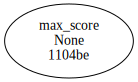

In [8]:
temp_stage.outputs._visualize()

In [9]:
temp_stage.outputs.compute()

Pre-execution phase for stage find_max_of_scores
	Type of arg <class 'list'> False
	Type of arg <class 'list'> False
Execution phase for stage find_max_of_scores


Artifact 'max_score': {'name': 'thing2', 'score': 2.0}

In [10]:
@stage([Artifact("NameOfBestThing")])
def retrieve_name(final_score_dictionary):
    return final_score_dictionary["name"]

In [11]:
final_stage = retrieve_name(temp_stage.outputs)
final_stage

Stage(function=<function retrieve_name at 0x7f09f2e51700>, args=[Artifact 'max_score': {'name': 'thing2', 'score': 2.0}], kwargs={}, outputs=Artifact 'NameOfBestThing', hashing_functions=None, pass_self=False, NameOfBestThing=Artifact 'NameOfBestThing')

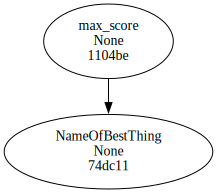

In [12]:
final_stage.outputs._visualize()

In [13]:
simple_rf

test_sklearn_alg(name='simple_rf', model_type=<class 'sklearn.ensemble._forest.RandomForestClassifier'>, n=1, balanced=1, test_percent=1, seed=2)

In [14]:
simple_rf.artifacts

[Artifact 'score', Artifact 'model', Artifact 'training_data', Artifact 'testing_data']

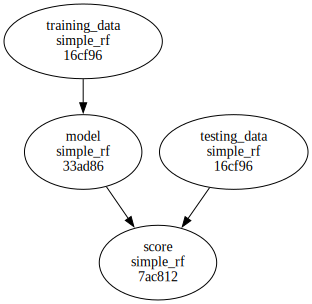

In [15]:
simple_rf.outputs._visualize()

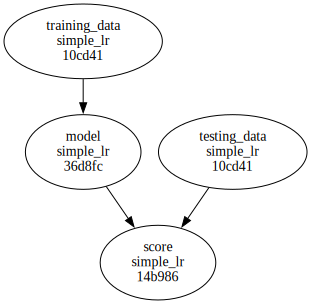

In [16]:
simple_lr.outputs._visualize()

In [17]:
simple_lr.artifacts.model

[Artifact 'model']

In [18]:
simple_lr.artifacts.model[0].cacher.get_path()

'model.pkl'

In [19]:
simple_lr.artifacts.model[0].compute

Stage(function=<function train_model at 0x7f09f2e9ad30>, args=[Artifact 'training_data', <class 'sklearn.linear_model._logistic.LogisticRegression'>, 1, 1, True], kwargs={}, outputs=Artifact 'model', hashing_functions=None, pass_self=False, model=Artifact 'model')

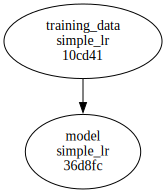

In [20]:
simple_lr.artifacts.model[0]._visualize()

In [21]:
simple_lr.artifacts.model[0].compute()

Pre-execution phase for stage train_model
	Type of arg <class 'artifact.Artifact'> True
		 train_model: training_data  not computed! , <class 'artifact.Artifact'> Artifact 'training_data'
Pre-execution phase for stage load_data
	Type of arg <class 'int'> False
	Type of arg <class 'int'> False
Execution phase for stage load_data
			 train_model, post load_data: Okay appending (array([[5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7,

/home/81n/micromamba/envs/curifactory/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Artifact 'model': LogisticRegression(class_weight='balanced', random_state=1)

In [5]:
compare_all

compare_algs(name='compare_all', alg_experiments=[test_sklearn_alg(name='simple_lr', model_type=<class 'sklearn.linear_model._logistic.LogisticRegression'>, n=1, balanced=True, test_percent=1, seed=1), test_sklearn_alg(name='simple_rf', model_type=<class 'sklearn.ensemble._forest.RandomForestClassifier'>, n=1, balanced=1, test_percent=1, seed=2), test_sklearn_alg(name='simple_lr_unbalanced', model_type=<class 'sklearn.ensemble._forest.RandomForestClassifier'>, n=1, balanced=1, test_percent=1, seed=3)])

In [80]:
compare_all.artifacts.model.train_model

[Artifact 'model': LogisticRegression(class_weight='balanced', random_state=1), Artifact 'model': RandomForestClassifier(class_weight='balanced', random_state=2), Artifact 'model': RandomForestClassifier(class_weight='balanced', random_state=3)]

In [6]:
compare_all.outputs

Artifact 'max_score'

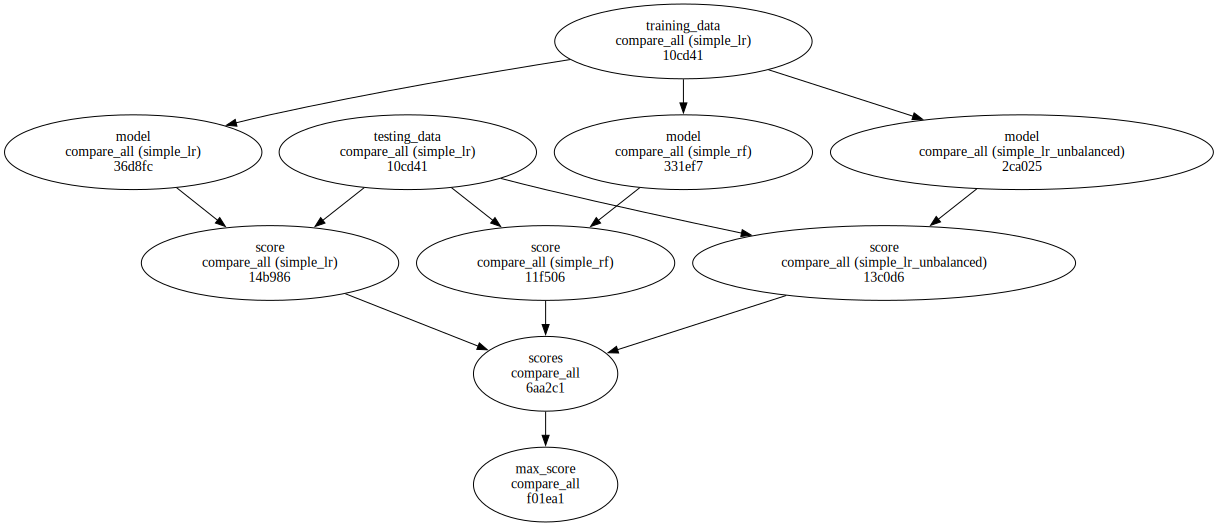

In [7]:
compare_all.outputs._visualize()

In [64]:
compare_all.artifacts.simple_rf

[Artifact 'score': 1.0, Artifact 'model': RandomForestClassifier(class_weight='balanced', random_state=2)]

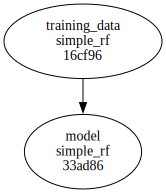

In [67]:
simple_rf.artifacts.model[0]._visualize()

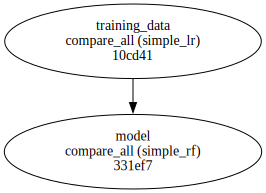

In [66]:
compare_all.artifacts.simple_rf.model[0]._visualize()

In [13]:
compare_all.run()

Pre-execution phase for stage find_max_of_scores
	Type of arg <class 'list'> False
	Type of arg <class 'artifact.ArtifactList'> True
		 find_max_of_scores: scores  not computed! , <class 'artifact.ArtifactList'> ArtifactList('scores', [Artifact 'score', Artifact 'score', Artifact 'score'])
Pre-execution phase for stage _aggregate_artifact_list
	Type of arg <class 'artifact.Artifact'> True
		 _aggregate_artifact_list: score  not computed! , <class 'artifact.Artifact'> Artifact 'score'
Pre-execution phase for stage test_model
	Type of arg <class 'artifact.Artifact'> True
		 test_model: model  not computed! , <class 'artifact.Artifact'> Artifact 'model'
Pre-execution phase for stage train_model
	Type of arg <class 'artifact.Artifact'> True
		 train_model: training_data  not computed! , <class 'artifact.Artifact'> Artifact 'training_data'
Pre-execution phase for stage load_data
	Type of arg <class 'int'> False
	Type of arg <class 'int'> False
Execution phase for stage load_data
			 train_m

/home/81n/micromamba/envs/curifactory/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


			 test_model, post train_model: Okay appending RandomForestClassifier(class_weight='balanced', random_state=3)
	Type of arg <class 'artifact.Artifact'> True
Execution phase for stage test_model
			 _aggregate_artifact_list, post test_model: Okay appending 1.0
Execution phase for stage _aggregate_artifact_list
			 find_max_of_scores, post _aggregate_artifact_list: Okay appending [1.0, 1.0, 1.0]
Execution phase for stage find_max_of_scores


Artifact 'max_score': {'name': 'simple_lr', 'score': 1.0}

In [ ]:
simple_rf.outputs.artifact_list()

In [ ]:
simple_rf2 = simple_rf.outputs.copy()

In [ ]:
simple_rf2.compute()

In [ ]:
simple_rf2.artifact_list()

In [ ]:
compare_all2 = compare_all.outputs.copy()
compare_all2.name = "compare_all2"
compare_all2._visualize()

In [ ]:
compare_all.outputs._visualize()

In [ ]:
compare_all.artifacts.scores[0].replace(ArtifactList("modded_scores", compare_all.artifacts.scores[0][0:2]))

In [ ]:
compare_all2

In [ ]:
compare_all.outputs.dependencies()

In [ ]:
compare_all.outputs

In [ ]:
compare_all2

In [ ]:
simple_rf.artifacts.training_data[0].replace(simple_lr.artifacts.training_data[0])

In [ ]:
compare_all.artifacts.simple_rf.training_data[0] == simple_lr.artifacts.training_data[0]

In [ ]:
compare_all.artifacts.simple_rf.training_data[0].replace(compare_all.artifacts.simple_lr.training_data[0])

In [ ]:
compare_all.outputs.filter("model").artifacts

In [ ]:
compare_all.outputs.filter("model").simple_rf.filter_string

In [ ]:
compare_all.outputs.filter("model").filter("simple_rf").artifacts

In [ ]:
compare_all.outputs.filter("simple_lr").artifacts

In [ ]:
compare_all.outputs.filter("simple_lr")._visualize()

In [ ]:
compare_all.outputs.filter("simple_rf")._visualize()

In [ ]:
compare_all.outputs.filter("simple_rf").filter("training_data")._visualize()

In [ ]:
compare_all.outputs.filter("simple_rf").artifacts

In [ ]:
compare_all.outputs.filter("simple_rf").resolve()._visualize()

In [ ]:
compare_all.outputs.filter("simple_rf").filter("model").resolve()

In [ ]:
compare_all.outputs.filter("simple_rf").filter("model").filter("training_data").artifacts

In [ ]:
compare_all.outputs.filter("compare_all")._visualize()

In [ ]:
ArtifactList("wat", compare_all.outputs.filter("model").artifacts)._visualize()

In [ ]:
from IPython.display import display
import ipywidgets as ipw
out1 = ipw.Output()
with out1:
    display(simple_lr.outputs._visualize())
out2 = ipw.Output()
with out2:
    display(simple_rf.outputs._visualize())
ipw.HBox([out1, out2])
# in principle, _these_ shouldn't be affected. only the corresponding artifacts within the compare_all experiment

In [ ]:
compare_all.outputs.dependencies()[0].dependencies()[0].dependencies()

In [ ]:
compare_all.artifacts

In [ ]:
compare_all.artifacts.model.list()

In [ ]:
compare_all.artifacts._visualize()

In [ ]:
for artifact in compare_all.artifacts.artifacts:
    print(artifact, artifact.hash_str)

In [ ]:
compare_all.alg_experiments[0].artifacts.artifacts

In [ ]:
compare_all.outputs.context

In [ ]:
# dict(globals(), **locals())

In [ ]:
compare_all.outputs.dependencies()[0][0].dependencies()[0].dependencies()[0].hash_debug

In [ ]:
compare_all.outputs.artifact_list()

In [ ]:
compare_all.outputs.artifact_list_debug()

In [ ]:
compare_all.outputs.artifact_tree()

In [ ]:
compare_all.run()

In [ ]:
simple_lr.run()

---

In [ ]:
from artifact import Artifact

a1 = Artifact("test1")
a2 = Artifact("test2")

a1.name, a2.name

In [ ]:
a1.pointer = a2

In [ ]:
a1.name, a2.name

In [ ]:
a1 == a2

In [ ]:
a3 = Artifact("test3")
a4 = Artifact("test4")

a3.replace(a4)

In [ ]:
a3.name, a4.name

In [ ]:
a3.name, a3._name

In [ ]:
id(a3), id(a4)

In [ ]:
a3.internal_id, a4.internal_id

In [ ]:
a3 == a4

In [ ]:
from stage import stage

In [ ]:
@stage([Artifact("something")])
def dothing(a):
    return a + 4

a5 = Artifact("test5")
a6 = dothing(a5)

In [ ]:
a6.dependencies()[0].name

The below should now say test7

In [ ]:
a7 = Artifact("test7")
a5.replace(a7)
a6.dependencies()[0].name

In [ ]:
a8 = Artifact("test8")
a9 = dothing(a8)

the below should still say test8, we only called replace on the copy, not what the actual dependency of a9

In [ ]:
a10 = a8.copy()
a11 = Artifact("test11")
a10.replace(a11)
a9.dependencies()[0].name

---

In [ ]:
which_is_best.outputs.compute()

In [ ]:
lr_vs_rf

In [ ]:
lr_vs_rf.models[0]

In [ ]:
lr_vs_rf.outputs.compute.args[1].compute.outputs.object

In [ ]:
lr_vs_rf.outputs.compute()

In [ ]:
lr_vs_rf.outputs.artifact_tree()

In [ ]:
lr_vs_rf.scores

In [ ]:
Artifacts["lr_vs_rf.outputs"].artifacts

In [ ]:
Artifacts["lr_vs_rf.outputs"].compute_hash()

In [ ]:
lr_vs_rf.models[1]

In [ ]:
smaller = lr_vs_rf.modify(name="smaller", model_set=[lr_vs_rf.model_set[0]])

In [ ]:
smaller.map()

In [ ]:
#from new_concepts import DataTest, Experiment
from new_concepts import Experiment, Artifact, Stage, stage, this_is_thing, this_is_tuple, DataTest, ModelTest1, live_test, ModelTest2, ModelTest3, ModelTest4, ModelTest5, ModelTest6, DataTest2

In [ ]:
this_is_thing()()

In [ ]:
t = this_is_thing()
t

In [ ]:
t.function.__name__

In [ ]:
tout = t()
tout

In [ ]:
tout.object

In [ ]:
t

In [ ]:
t2 = this_is_tuple()
t2

In [ ]:
d = DataTest("test")

In [ ]:
d

In [ ]:
d.real_thing

In [ ]:
d.real_thing.compute()

In [ ]:
d

In [ ]:
d.act_t1, d.act_t2

In [ ]:
d.act_t1.compute()

In [ ]:
d

In [ ]:
m1 = ModelTest1("m1", test=d)
m1

In [ ]:
m1.model.compute()

In [ ]:
m1.model.compute()

In [ ]:
d

In [ ]:
m1.test

In [ ]:
m1

In [ ]:
m2 = ModelTest1("m2", test=DataTest("d2"))

In [ ]:
m2

In [ ]:
m2.model.compute()

In [ ]:
m3 = live_test()
m3

In [ ]:
m3.final_model.compute()

In [ ]:
m4 = ModelTest2("m4_2", test=DataTest("d4"))
m4

In [ ]:
m4.model.compute()

In [ ]:
this_is_thing

In [ ]:
m5 = ModelTest4("m5_4", test=DataTest("d5"))
m5

In [ ]:
m5.model.compute()

In [ ]:
m5

In [ ]:
m6 = ModelTest5(name="m6_5", test=DataTest(name='d6'))
m6

In [ ]:
m6.model.compute()

In [ ]:
m7 = ModelTest6("m7_6", test=DataTest2("d7"))
m7

In [ ]:
from dataclasses import dataclass

@dataclass
class thing(Experiment):
    my_thing: Artifact = lambda self: this_is_tuple("5")

In [ ]:
t = thing
t